In [1]:
import time
import selfies as sf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import PredictionErrorDisplay as PED
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold,RandomizedSearchCV,GridSearchCV
import pickle
from joblib import dump, load

import datetime
import re

In [2]:
X=pd.read_pickle("./calc_descriptors_final.pkl")
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,NumRadicalElectrons,AvgIpc,BalabanJ,HallKierAlpha,Ipc,...,fr_NH0,fr_NH2,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ketone,fr_para_hydroxylation,fr_piperdine
0,13.421670,1.813652,-4.213449,93.904762,292.287,0,3.203010,2.128362,-1.40,7.621569,...,0,0,0,0,0,4,2,0,0,0
1,14.938999,0.626931,-6.373747,66.444444,660.651,0,3.295038,3.117964,-3.23,15.455677,...,1,1,2,0,0,0,2,2,0,0
2,15.674552,1.517576,-4.913705,45.409091,598.604,0,3.352137,1.857894,-4.67,14.762903,...,0,0,1,0,0,6,1,2,0,0
3,15.162100,1.184590,-4.773941,45.804878,554.551,0,3.323824,1.856690,-4.47,13.642638,...,0,0,1,0,0,6,1,2,0,0
4,14.690159,1.393863,-6.473465,57.538462,534.693,0,3.304427,2.630768,-3.15,15.271236,...,0,0,0,0,0,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406198,13.510691,1.513305,-7.333639,19.571429,452.142,0,2.615850,6.583700,-2.04,6.309594,...,1,0,0,0,0,0,0,0,0,0
406199,15.059651,0.354457,-4.267296,30.500000,588.664,0,4.039629,2.336180,-5.31,15.206860,...,2,0,5,0,3,8,1,1,0,0
406200,9.735870,0.859880,-5.445191,72.090909,626.564,15,3.337697,1.973088,-0.64,15.536231,...,0,0,0,0,0,1,0,0,0,0
406201,15.164901,0.812307,-5.526028,60.818182,457.483,0,3.064037,2.520709,-3.11,11.652133,...,2,1,0,1,0,3,0,4,0,0


In [3]:
scaler=StandardScaler().fit(X)
scaled=scaler.transform(X)
scaled

array([[ 0.02159097,  0.58775404,  0.62281861, ..., -0.49149382,
        -0.3225622 , -0.26182584],
       [ 0.68440624, -0.68406985, -0.89998339, ...,  2.57854662,
        -0.3225622 , -0.26182584],
       [ 1.00571817,  0.27044515,  0.12920525, ...,  2.57854662,
        -0.3225622 , -0.26182584],
       ...,
       [-1.58847822, -0.434415  , -0.24544081, ..., -0.49149382,
        -0.3225622 , -0.26182584],
       [ 0.78308735, -0.48539938, -0.30242338, ...,  5.64858707,
        -0.3225622 , -0.26182584],
       [-0.93406733,  0.24826159, -1.64346614, ..., -0.49149382,
        -0.3225622 ,  4.35244987]])

In [4]:
X.columns

Index(['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'SPS',
       'MolWt', 'NumRadicalElectrons', 'AvgIpc', 'BalabanJ', 'HallKierAlpha',
       'Ipc', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
       'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6',
       'PEOE_VSA7', 'SMR_VSA10', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA6',
       'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA12',
       'SlogP_VSA7', 'SlogP_VSA8', 'EState_VSA11', 'EState_VSA2',
       'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6',
       'VSA_EState10', 'VSA_EState6', 'NumAliphaticHeterocycles',
       'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'MolLogP',
       'fr_Al_COO', 'fr_Al_OH_noTert', 'fr_Ar_N', 'fr_NH0', 'fr_NH2',
       'fr_allylic_oxid', 'fr_aniline', 'fr_aryl_methyl', 'fr_bicyclic',
       'fr_ester', 'fr_ketone', 'fr_para_hydroxylation', 'fr_piperdine'],
      dtype='object')

In [5]:
import missingno as msno

<Axes: >

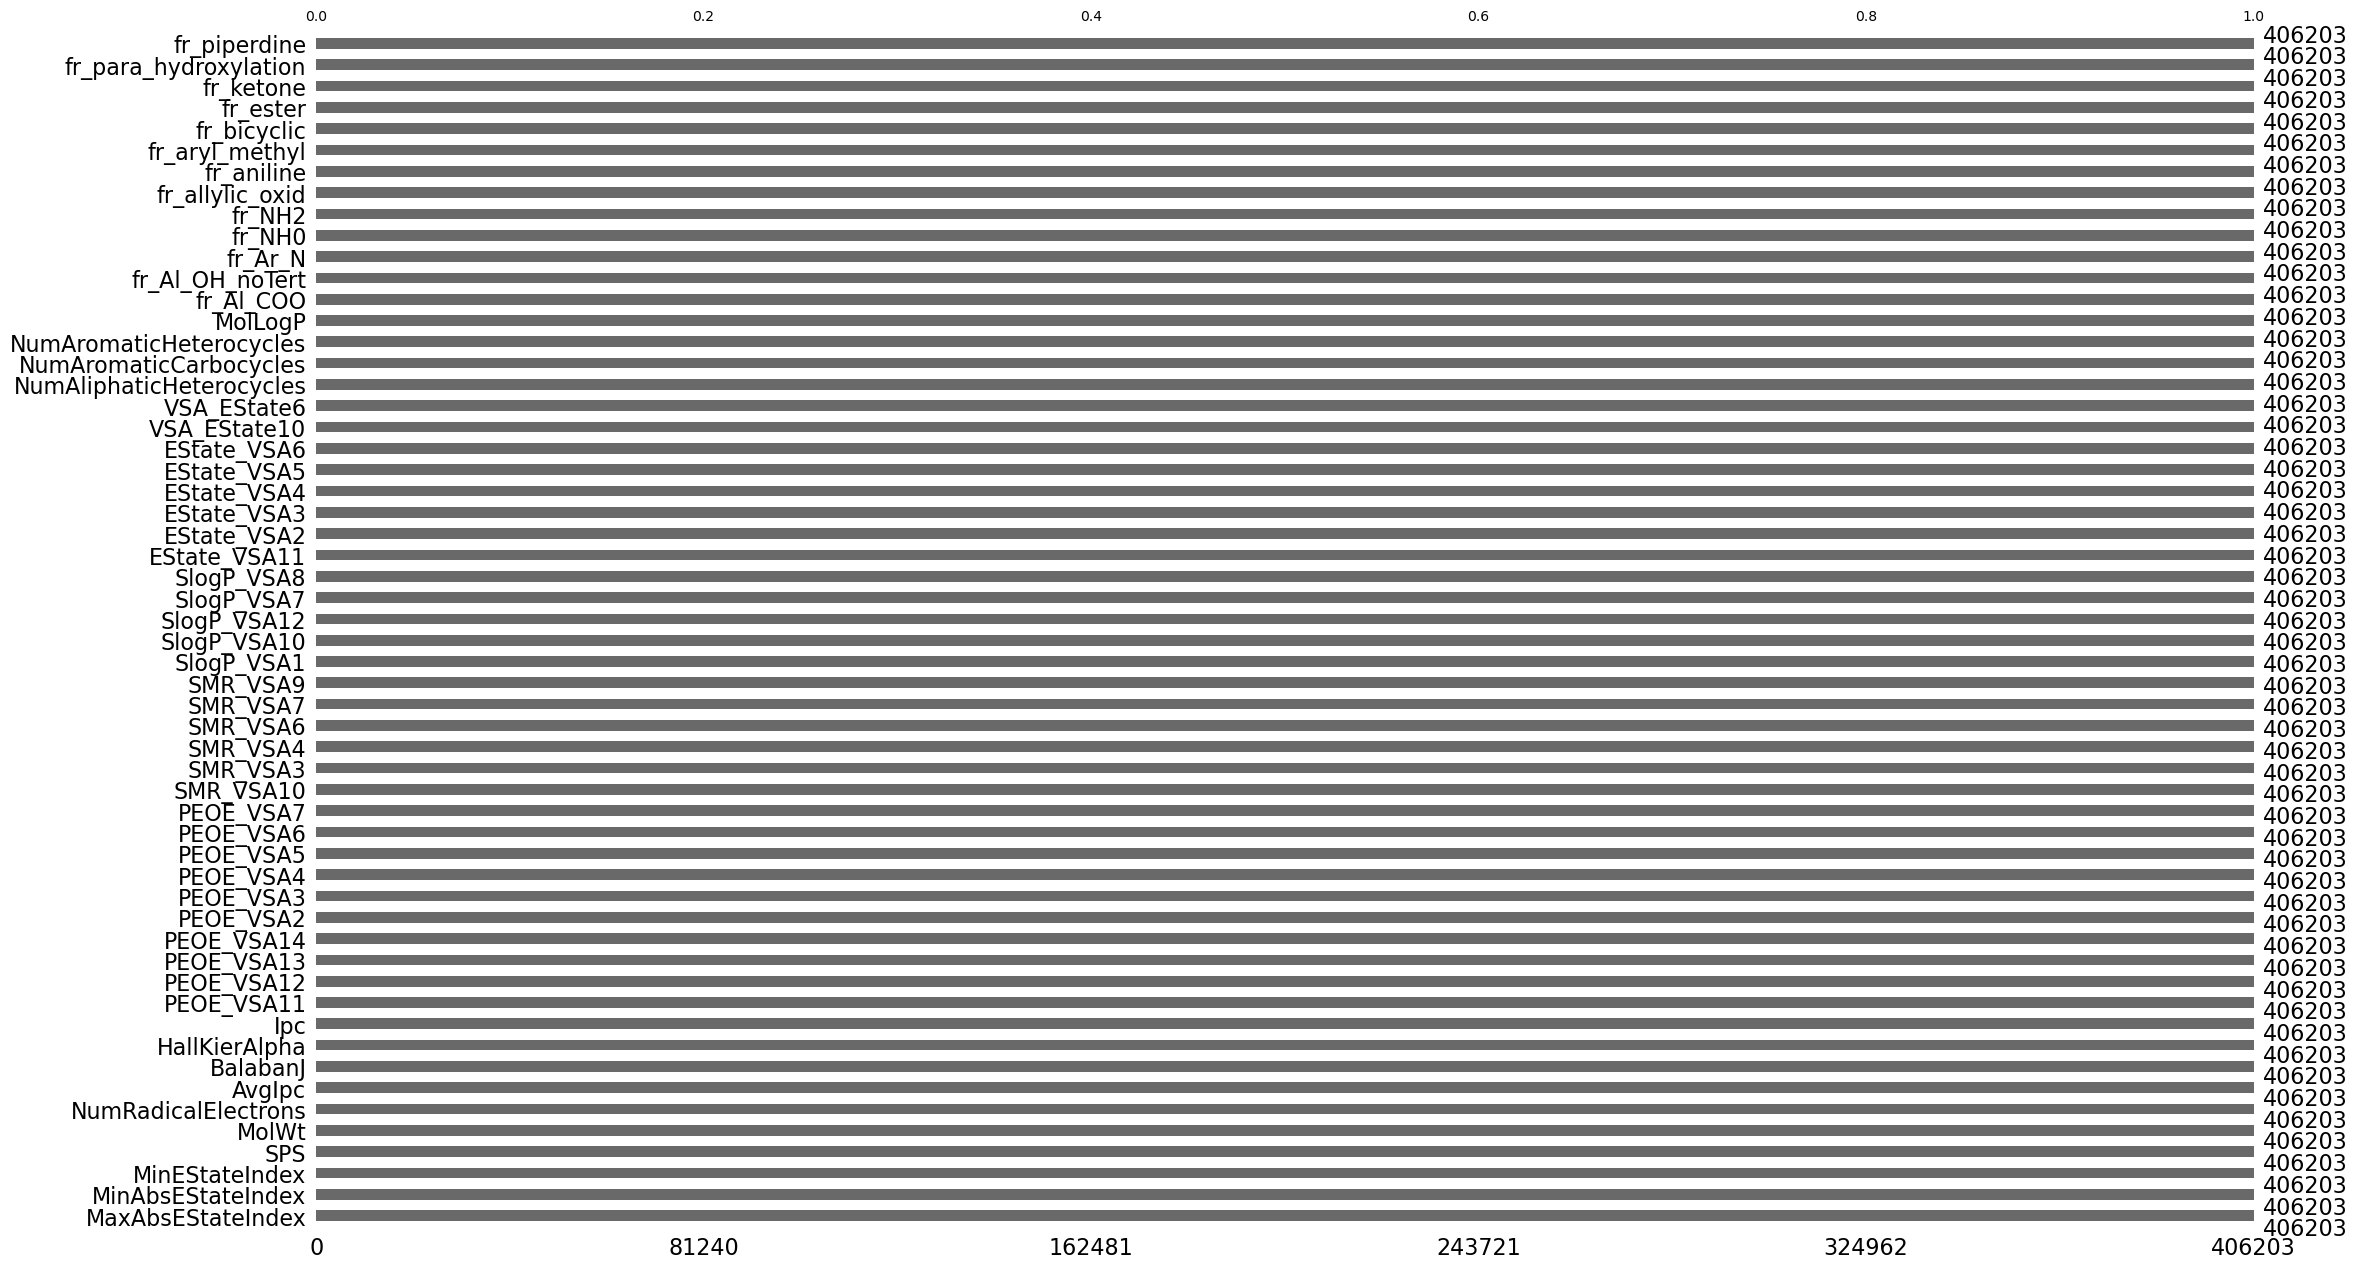

In [6]:
msno.bar(X)

In [7]:
scaled[np.isfinite(scaled).any(axis=1)]

array([[ 0.02159097,  0.58775404,  0.62281861, ..., -0.49149382,
        -0.3225622 , -0.26182584],
       [ 0.68440624, -0.68406985, -0.89998339, ...,  2.57854662,
        -0.3225622 , -0.26182584],
       [ 1.00571817,  0.27044515,  0.12920525, ...,  2.57854662,
        -0.3225622 , -0.26182584],
       ...,
       [-1.58847822, -0.434415  , -0.24544081, ..., -0.49149382,
        -0.3225622 , -0.26182584],
       [ 0.78308735, -0.48539938, -0.30242338, ...,  5.64858707,
        -0.3225622 , -0.26182584],
       [-0.93406733,  0.24826159, -1.64346614, ..., -0.49149382,
        -0.3225622 ,  4.35244987]])

In [8]:
df=pd.read_pickle("./gap_smile.pkl")

y=df["GAP"].to_numpy() #[0:100001:10]
X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.3,random_state=42)
y.shape

(406203,)

In [9]:
X["gap"]=df["GAP"]

In [10]:
for num,col in enumerate(X.columns):
    print(num,col)

0 MaxAbsEStateIndex
1 MinAbsEStateIndex
2 MinEStateIndex
3 SPS
4 MolWt
5 NumRadicalElectrons
6 AvgIpc
7 BalabanJ
8 HallKierAlpha
9 Ipc
10 PEOE_VSA11
11 PEOE_VSA12
12 PEOE_VSA13
13 PEOE_VSA14
14 PEOE_VSA2
15 PEOE_VSA3
16 PEOE_VSA4
17 PEOE_VSA5
18 PEOE_VSA6
19 PEOE_VSA7
20 SMR_VSA10
21 SMR_VSA3
22 SMR_VSA4
23 SMR_VSA6
24 SMR_VSA7
25 SMR_VSA9
26 SlogP_VSA1
27 SlogP_VSA10
28 SlogP_VSA12
29 SlogP_VSA7
30 SlogP_VSA8
31 EState_VSA11
32 EState_VSA2
33 EState_VSA3
34 EState_VSA4
35 EState_VSA5
36 EState_VSA6
37 VSA_EState10
38 VSA_EState6
39 NumAliphaticHeterocycles
40 NumAromaticCarbocycles
41 NumAromaticHeterocycles
42 MolLogP
43 fr_Al_COO
44 fr_Al_OH_noTert
45 fr_Ar_N
46 fr_NH0
47 fr_NH2
48 fr_allylic_oxid
49 fr_aniline
50 fr_aryl_methyl
51 fr_bicyclic
52 fr_ester
53 fr_ketone
54 fr_para_hydroxylation
55 fr_piperdine
56 gap


In [ ]:
#sel=list(X.columns[:])
##sel.append("gap")
#p=sns.PairGrid(X, vars=sel,corner=True)
#p.map(sns.scatterplot)

In [ ]:
#fig=p.figure.get_figure()

In [ ]:
#fig.savefig("correlation_grid_GBR.png", dpi=100)

## parameter tuning

In [ ]:
#params={'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.037093608301934304, 'loss': 'squared_error', 'max_depth': 11, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1134, 'n_iter_no_change': None, 'random_state': None, 'subsample': 0.6660140527550087, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
#The mean squared error (MSE) on test set: 0.0684 | train: 0.9898130968615333 | test: 0.9588176785297542
params={'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.0321079969138713, 'loss': 'squared_error', 'max_depth': 12, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1171, 'n_iter_no_change': None, 'random_state': None, 'subsample': 0.6917115704474215, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
#The mean squared error (MSE) on test set: 0.0729 | train: 0.9916107935234741 | test: 0.9562688268085251
#X_train, X_test, y_train, y_test = train_test_split(data_pca,y,test_size=0.33333,random_state=42) #data_pca
#best_params=search.best_estimator_.get_params()
#t0=time.time()
#reg=GradientBoostingRegressor(**params)
#reg.fit(X_train, y_train)
#t1=time.time()
#print("time",t1-t0)
#y_pred=reg.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [ ]:
##pickle
#with open('descr_GBR.pkl', 'wb') as f:
#    pickle.dump(reg, f)
##joblib
#dump(reg, 'descr_GBR.joblib') 

In [11]:
with open('/home/sat/ML_GAP/GBR_descr/descr_GBR.pkl', 'rb') as file:
    reg = pickle.load(file)

In [12]:
reg.n_features_in_

56

In [13]:
y_pred_train=reg.predict(X_train)

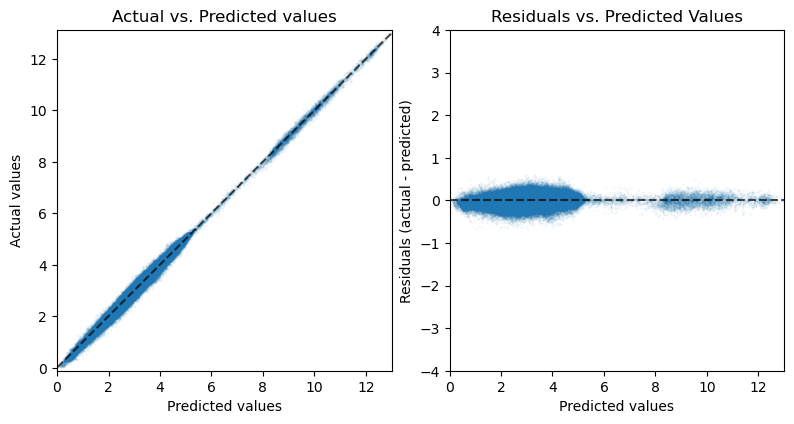

0.9916742934643004


/home/sat/anaconda3/envs/py312scikitlearn/lib/python3.12/site-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


In [14]:
#prediction on trained molecules
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
plt.tight_layout()
PED.from_predictions(
    y_train,
    y_pred=y_pred_train,
    kind="actual_vs_predicted",
    subsample=None,
    ax=axs[0],
    random_state=0,
    scatter_kwargs={"s":0.4,"alpha":0.05}
)
axs[0].set_title("Actual vs. Predicted values")
axs[0].set_ylim(0,13)
axs[0].set_xlim(0,13)
axs[0].set_xticks(range(0,14,2))
axs[0].set_yticks(range(0,14,2))

PED.from_predictions(
    y_train,
    y_pred=y_pred_train,
    kind="residual_vs_predicted",
    subsample=None,
    ax=axs[1],
    random_state=0,
    scatter_kwargs={"s":0.4,"alpha":0.05}
)
axs[1].set_title("Residuals vs. Predicted Values")
axs[1].set_xlim(0,13)
axs[1].set_ylim(-4,4)
#fig.suptitle("Plotting cross-validated predictions")
#plt.title("pred vs. test")
plt.show()
print(r2_score(y_pred=y_pred_train,y_true=y_train))

In [15]:
y_pred=reg.predict(X_test)

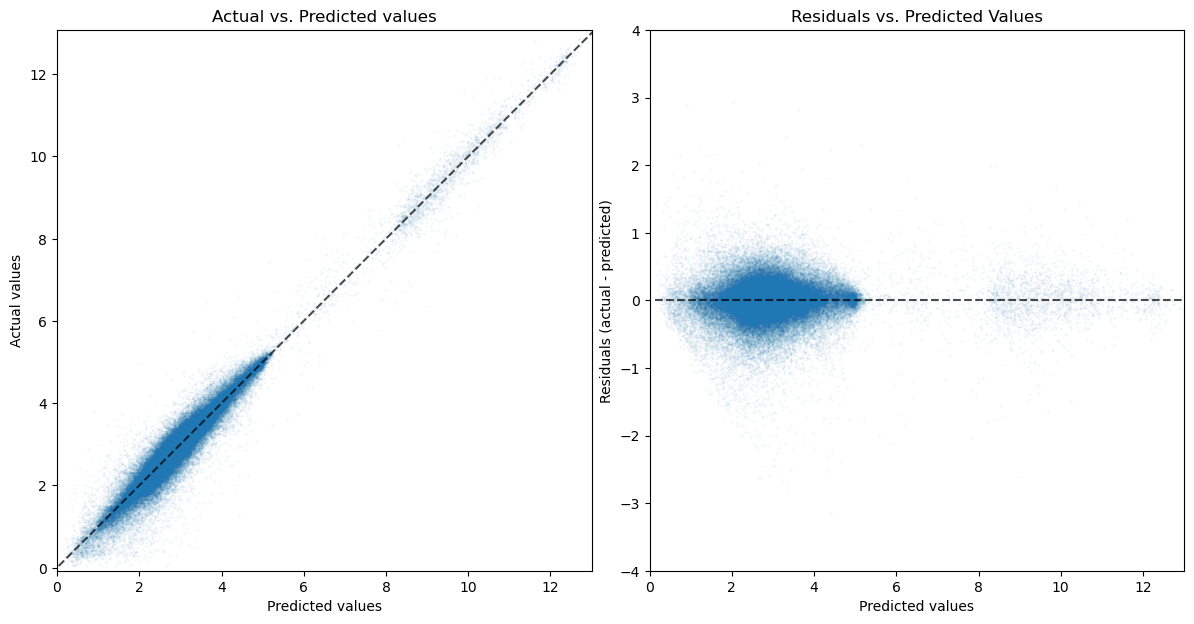

0.9562428012228215


/home/sat/anaconda3/envs/py312scikitlearn/lib/python3.12/site-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


In [16]:
#prediction on untrained/test molecules
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
plt.tight_layout()
PED.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=None,
    ax=axs[0],
    random_state=0,
    scatter_kwargs={"s":0.4,"alpha":0.05}
)
axs[0].set_title("Actual vs. Predicted values")
axs[0].set_ylim(0,13)
axs[0].set_xlim(0,13)
axs[0].set_xticks(range(0,14,2))
axs[0].set_yticks(range(0,14,2))

PED.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=None,
    ax=axs[1],
    random_state=0,
    scatter_kwargs={"s":0.40,"alpha":0.05}
)
axs[1].set_title("Residuals vs. Predicted Values")
axs[1].set_xlim(0,13)
axs[1].set_ylim(-4,4)
#fig.suptitle("Plotting cross-validated predictions")
#plt.title("pred vs. test")
plt.show()
print(r2_score(y_pred=y_pred,y_true=y_test))

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406203 entries, 0 to 406202
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MaxAbsEStateIndex         406203 non-null  float64
 1   MinAbsEStateIndex         406203 non-null  float64
 2   MinEStateIndex            406203 non-null  float64
 3   SPS                       406203 non-null  float64
 4   MolWt                     406203 non-null  float64
 5   NumRadicalElectrons       406203 non-null  int64  
 6   AvgIpc                    406203 non-null  float64
 7   BalabanJ                  406203 non-null  float64
 8   HallKierAlpha             406203 non-null  float64
 9   Ipc                       406203 non-null  float64
 10  PEOE_VSA11                406203 non-null  float64
 11  PEOE_VSA12                406203 non-null  float64
 12  PEOE_VSA13                406203 non-null  float64
 13  PEOE_VSA14                406203 non-null  f

In [18]:
print(X.nunique())

MaxAbsEStateIndex           389025
MinAbsEStateIndex           394946
MinEStateIndex              394930
SPS                          66616
MolWt                       118295
NumRadicalElectrons             33
AvgIpc                      376993
BalabanJ                    384491
HallKierAlpha                 7773
Ipc                         376977
PEOE_VSA11                    8534
PEOE_VSA12                    4971
PEOE_VSA13                    1010
PEOE_VSA14                    1590
PEOE_VSA2                     2249
PEOE_VSA3                     1512
PEOE_VSA4                      811
PEOE_VSA5                      474
PEOE_VSA6                    18399
PEOE_VSA7                    37817
SMR_VSA10                    18111
SMR_VSA3                      2481
SMR_VSA4                      1846
SMR_VSA6                      5700
SMR_VSA7                     31136
SMR_VSA9                      1030
SlogP_VSA1                    3238
SlogP_VSA10                    406
SlogP_VSA12         

In [19]:
reg.feature_importances_

array([7.90153554e-03, 2.20798555e-02, 5.41407646e-03, 6.16847466e-03,
       3.84541068e-03, 5.37131165e-03, 6.20180904e-03, 8.40410032e-03,
       2.14299865e-02, 3.43347484e-03, 7.13229260e-03, 6.25829887e-03,
       4.16218345e-03, 7.84334590e-03, 7.65436146e-03, 1.17656508e-02,
       2.73473920e-03, 1.48080423e-03, 4.66982068e-03, 6.61184233e-03,
       3.18947760e-01, 1.25754807e-02, 4.63256729e-03, 5.54242634e-03,
       3.54537051e-01, 1.08279969e-02, 6.40988116e-03, 2.30226997e-03,
       2.40949730e-03, 2.51685143e-03, 2.43611142e-02, 3.57168992e-04,
       1.48308822e-03, 7.43113020e-04, 3.00275767e-04, 2.53358676e-04,
       1.67690281e-04, 2.18340097e-03, 5.77119487e-03, 7.68930032e-03,
       2.43611942e-03, 1.56467147e-03, 4.63501603e-03, 1.60843398e-03,
       4.39809920e-04, 1.10441340e-03, 1.19268424e-02, 5.78045935e-04,
       1.07914933e-02, 3.55461113e-04, 4.30626870e-04, 2.09443608e-03,
       1.97360294e-03, 4.33559460e-02, 5.27723684e-04, 1.60249534e-03])

[('EState_VSA6', 0.00016769028112372864), ('EState_VSA5', 0.0002533586761247892), ('EState_VSA4', 0.00030027576683221797), ('fr_aniline', 0.00035546111272848237), ('EState_VSA11', 0.0003571689919175693), ('fr_aryl_methyl', 0.0004306268701694323), ('fr_Al_OH_noTert', 0.0004398099196385116), ('fr_para_hydroxylation', 0.0005277236836350452), ('fr_NH2', 0.0005780459353178737), ('EState_VSA3', 0.0007431130195376715), ('fr_Ar_N', 0.001104413402410501), ('PEOE_VSA5', 0.001480804233055884), ('EState_VSA2', 0.0014830882240174821), ('NumAromaticHeterocycles', 0.0015646714728290855), ('fr_piperdine', 0.0016024953385289705), ('fr_Al_COO', 0.0016084339785770738), ('fr_ester', 0.0019736029426533157), ('fr_bicyclic', 0.0020944360754341315), ('VSA_EState10', 0.002183400973898018), ('SlogP_VSA10', 0.0023022699682205545), ('SlogP_VSA12', 0.0024094972964538723), ('NumAromaticCarbocycles', 0.0024361194223689506), ('SlogP_VSA7', 0.002516851429005792), ('PEOE_VSA4', 0.0027347392046638535), ('Ipc', 0.0034334

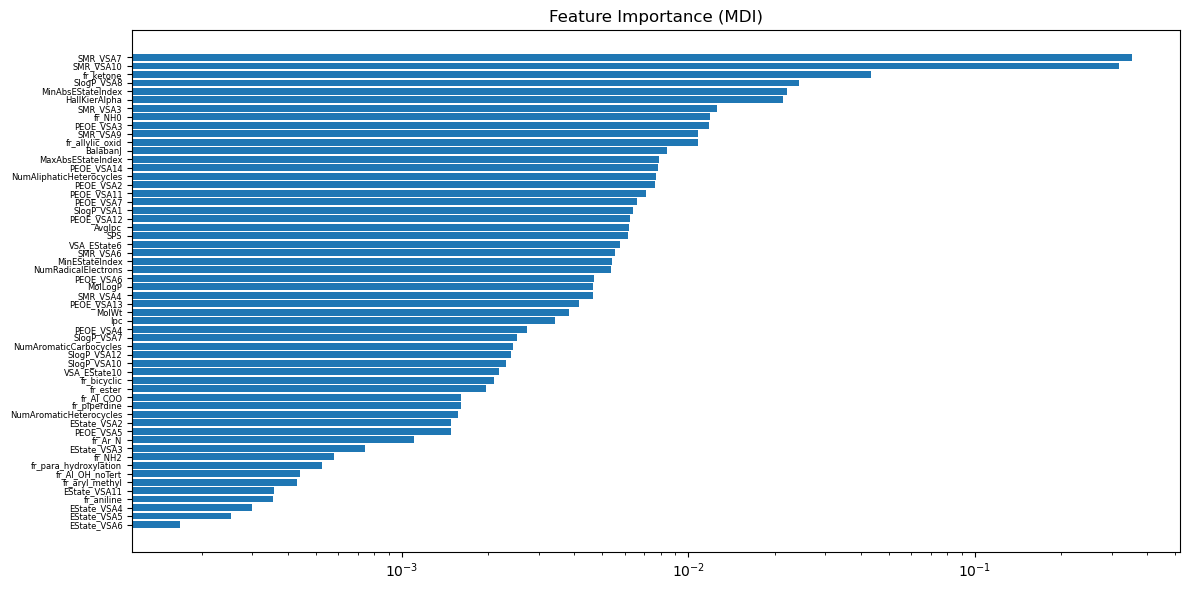

In [20]:
from sklearn.inspection import permutation_importance
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
print(list(zip(np.array(X.columns)[sorted_idx],feature_importance[sorted_idx])))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
kwargs={"fontsize":6}
plt.yticks(pos, np.array(X.columns)[sorted_idx],**kwargs)
plt.xscale("log")
plt.title("Feature Importance (MDI)")

#result = permutation_importance(
#    reg, X_test, y_test, n_repeats=4, random_state=42, n_jobs=-1
#)
#sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
#plt.boxplot(
#    result.importances[sorted_idx].T,
#    vert=False,
#    labels=np.array(X.columns)[sorted_idx],
#)
#plt.title("Feature Importance (test set)")
fig.tight_layout()
plt.show()

## analyse random search GBR

In [21]:
#ff=open("/home/sat/ML_GAP/GBR_descr/log2000_0.log","r")
ff=open("/home/sat/ML_GAP/GBR_descr/slurm-512760.out","r")

rr=ff.read().splitlines()
rr=[x for x in rr if "CV" in x]
rr=[x.replace("END ","") for x in rr]
rr=[x.replace("CV ","CV=") for x in rr]
rr=[x.replace("[","") for x in rr]
rr=[x.replace("]",",") for x in rr]
#rr=[x.replace("/1","") for x in rr]
rr=[x.replace("/2","") for x in rr]
rr=[x.replace(";","") for x in rr]
rr=[x.replace(")","),") for x in rr]
rr=[x.replace(",,",",") for x in rr]
#rr=[y.split("=")[1] for y in x for x in rr]
rr=[x.split("=") for x in rr]
print(rr[0])
rm_list=['CV',"learning_rate", "loss", "max_depth", "n_estimators", "subsample",'alpha', 'ccp_alpha', 'criterion', 'init','max_features','max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_iter_no_change', 'random_state', 'tol', 'validation_fraction', 'verbose', 'warm_start',"score","test","train","time","total","min",",","\(","\)",]
#rm_list=["CV","alpha","beta_1","hidden_layer_sizes","max_iter","n_iter_no_change","tol","score","test","train","time","total","min",",","\(","\)","s"]
for nrun,run in enumerate(rr):
    for num,item in enumerate(run):
        for rm in rm_list:
            item=re.sub(rm,"",item)
        run[num]=item
    rr[nrun]=list(filter(None,run))
rr

<>:18: SyntaxWarning: invalid escape sequence '\('
<>:18: SyntaxWarning: invalid escape sequence '\)'


['CV', '2, learning_rate', '0.049932924209851834, loss', 'squared_error, max_depth', '9, n_estimators', '1014, subsample', '0.22904180608409974, score', '(train', '0.975, test', '0.940), total time', '18.4min']


[['2 ',
  '0.049932924209851834 ',
  'squared_error ',
  '9 ',
  '1014 ',
  '0.22904180608409974 ',
  '0.975 ',
  '0.940  ',
  '18.4'],
 ['1 ',
  '0.049932924209851834 ',
  'squared_error ',
  '9 ',
  '1014 ',
  '0.22904180608409974 ',
  '0.974 ',
  '0.940  ',
  '18.5'],
 ['1 ',
  '0.05058265802441404 ',
  'squared_error ',
  '12 ',
  '1035 ',
  '0.2115312125207079 ',
  '0.991 ',
  '0.943  ',
  '22.1'],
 ['2 ',
  '0.05058265802441404 ',
  'squared_error ',
  '12 ',
  '1035 ',
  '0.2115312125207079 ',
  '0.991 ',
  '0.942  ',
  '22.2'],
 ['1 ',
  '0.04623873301291946 ',
  'squared_error ',
  '9 ',
  '987 ',
  '0.38318092164684586 ',
  '0.978 ',
  '0.944  ',
  '30.5'],
 ['2 ',
  '0.04623873301291946 ',
  'squared_error ',
  '9 ',
  '987 ',
  '0.38318092164684586 ',
  '0.979 ',
  '0.943  ',
  '33.2'],
 ['2 ',
  '0.03061695553391381 ',
  'squared_error ',
  '11 ',
  '1076 ',
  '0.5087407548138583 ',
  '0.989 ',
  '0.947  ',
  '52.6'],
 ['1 ',
  '0.03061695553391381 ',
  'squared_error ',
 

In [22]:
pd.set_option("display.precision", 7)
pd.set_option('display.min_rows', 40)
cols= ["CV","learning_rate", "loss", "max_depth", "n_estimators", "subsample","score_train","score_test","time"] #["learning_rat", "loss=absolute_error", "max_depth", "n_estimators", "subsample"]
dty={"CV":np.int16,
     "learning_rate":np.float32,
     "loss":str,
     "max_depth":np.int16,
     "n_estimators":np.int16,
     "subsample":np.float32,
     "score_train":np.float32,
     "score_test":np.float32,
     "time":np.float32
    }
frame=pd.DataFrame(data=rr, columns=cols)#,dtype=dty)
frame=frame.astype(dtype=dty)
#frame["hidden_layers"]=[x.split() for x in frame["hidden_layers"]]
#frame["hidden_layers"]=[[int(y) for y in x] for x in frame["hidden_layers"]]
#frame["hl_sum"]=[sum(x) for x in frame["hidden_layers"]]
#frame["hl_len"]=[len(x) for x in frame["hidden_layers"]]
print(len(frame)/4)
frame.sort_values(by='score_test',ascending=False)

1000.0


,CV,learning_rate,loss,max_depth,n_estimators,subsample,score_train,score_test,time
3508,1,0.0493951,squared_error,12,816,0.6588863,0.996,0.948,57.2000008
270,1,0.0572106,squared_error,10,1147,0.6810863,0.993,0.948,70.4000015
3463,1,0.0336771,squared_error,12,914,0.6801834,0.995,0.948,65.1999969
2202,1,0.0379604,squared_error,12,1134,0.6103481,0.997,0.948,72.0000000
2937,1,0.0437385,squared_error,11,1129,0.6602679,0.995,0.948,73.3000031
2197,1,0.0348179,squared_error,12,1180,0.6093701,0.996,0.948,75.5999985
1014,1,0.0440817,squared_error,12,885,0.6819111,0.996,0.948,63.5000000
1411,1,0.0503439,squared_error,11,908,0.6853711,0.994,0.948,61.2000008
695,1,0.0251255,squared_error,11,1151,0.5854270,0.989,0.948,65.3000031
698,1,0.0370936,squared_error,11,1134,0.6660141,0.993,0.948,74.3000031


In [23]:
df_avg=frame.drop("loss",axis=1).sort_values(by='learning_rate',ascending=False).groupby(np.arange(len(frame.index))//2).mean()
df_avg.sort_values(by='score_test',ascending=False)

,CV,learning_rate,max_depth,n_estimators,subsample,score_train,score_test,time
1671,1.5,0.0276208,12.0,1159.0,0.5842999,0.9940,0.9480000,70.3000031
1146,1.5,0.0405511,12.0,908.0,0.5039526,0.9950,0.9475000,47.4500008
868,1.5,0.0472553,12.0,860.0,0.6300699,0.9960,0.9475000,57.5500031
1129,1.5,0.0408131,12.0,873.0,0.6558629,0.9950,0.9475000,59.5499992
1621,1.5,0.0288577,11.0,999.0,0.6008421,0.9890,0.9475000,58.5000000
1132,1.5,0.0407814,12.0,960.0,0.4706191,0.9950,0.9475000,46.4000015
299,1.5,0.0625769,10.0,1156.0,0.6873800,0.9940,0.9475000,72.3000031
1894,1.5,0.0223612,12.0,1041.0,0.6779516,0.9920,0.9475000,74.0000000
811,1.5,0.0487535,12.0,1180.0,0.6807719,0.9980,0.9475000,86.0500031
1148,1.5,0.0404153,11.0,941.0,0.6518039,0.9920,0.9475000,60.0500031


In [24]:
 #datetime.timedelta(minutes=2.9)

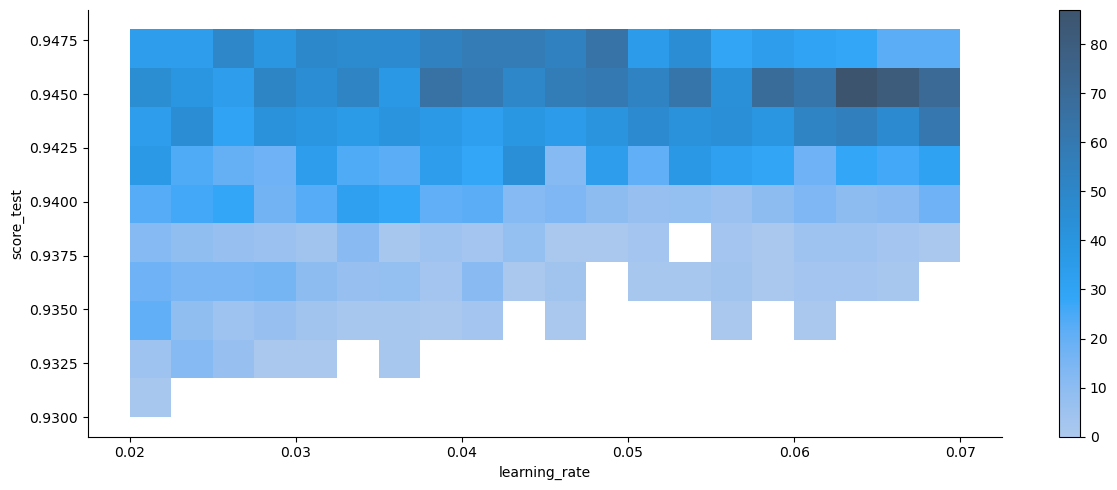

In [25]:
kwargs={"discrete":(False,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="learning_rate",y="score_test",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)

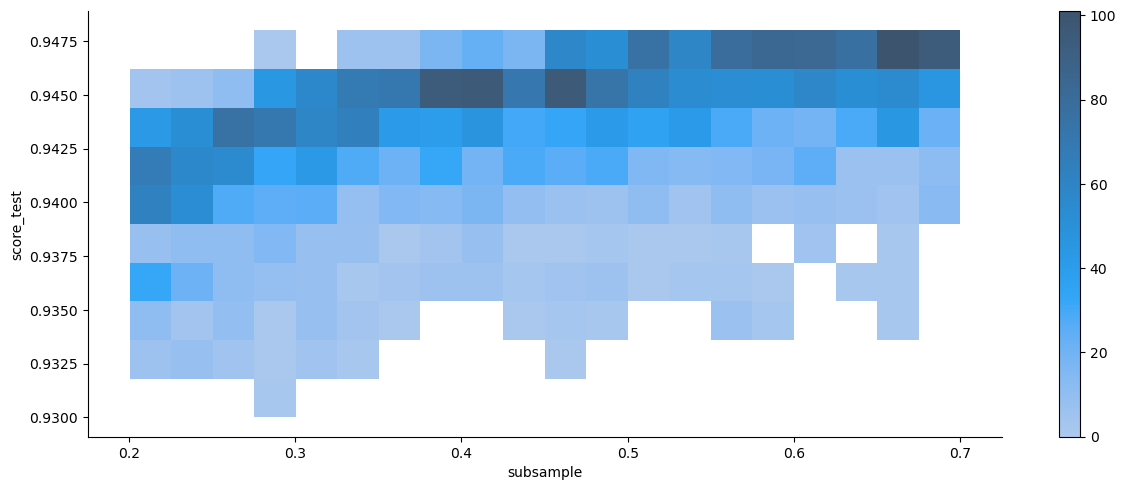

In [26]:
kwargs={"discrete":(False,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="subsample",y="score_test",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)

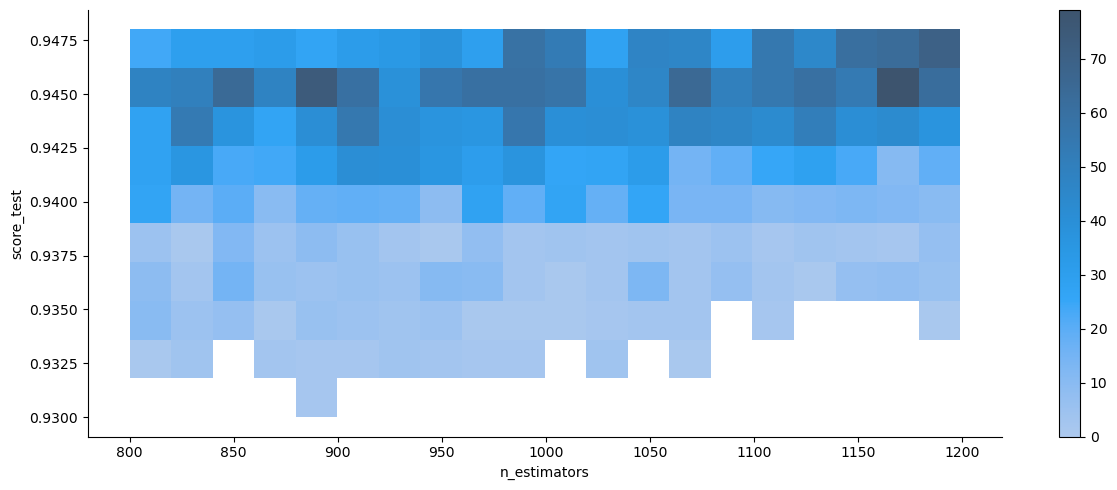

In [27]:
kwargs={"discrete":(False,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="n_estimators",y="score_test",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)
#plot.set(ylim=(0.93,0.95))

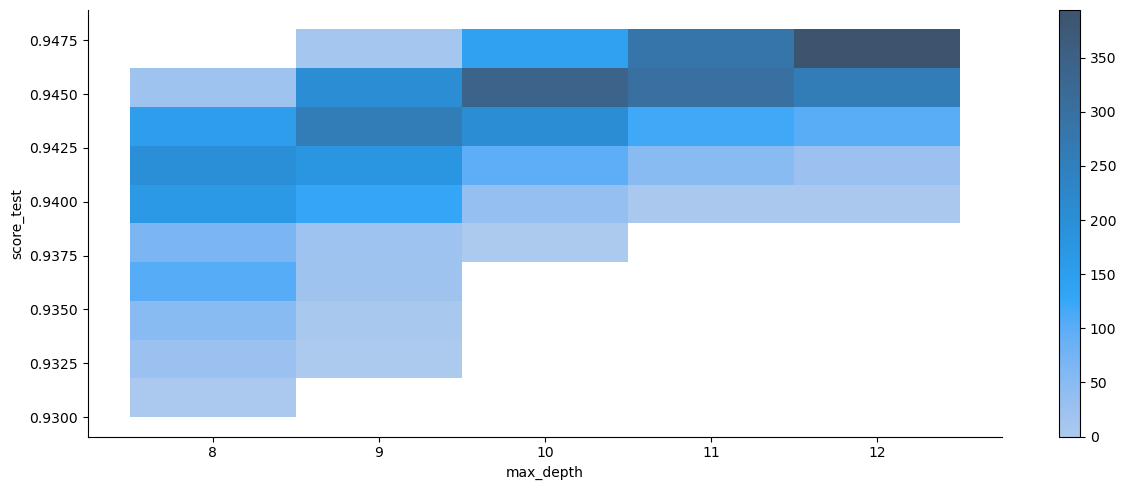

In [28]:
kwargs={"discrete":(True,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="max_depth",y="score_test",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)
#plot.set(ylim=(0.85,0.96))

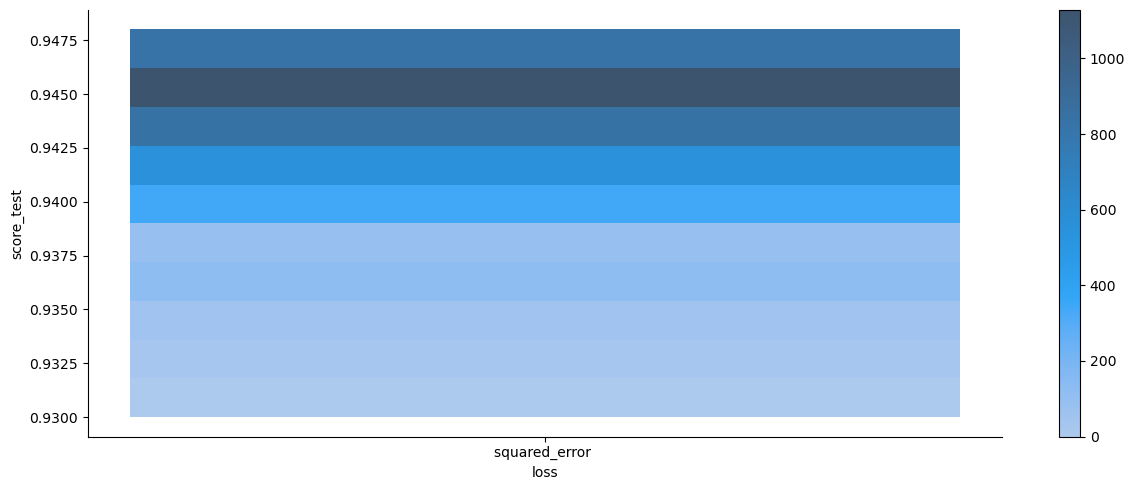

In [29]:
kwargs={"discrete":(True,False), "bins":(2,10),"cbar":True}
plot=sns.displot(frame, x="loss",y="score_test",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)
#plot.set(ylim=(0.85,0.95))

In [30]:
fits=4000
ac=3436
elapsed=7*24+21.4 #h
pa=ac/(elapsed)
(fits-ac)/pa

31.08894062863795